In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats

from tools.utils import filtered_df_two_columns, pearson_corr_coef, prediction_analysis, regression_analysis_results, calculate_MSE

Given the preliminary feature analysis conducted in the `EDA.ipynb`, we have found that the following variables affect retention rates.

* Four-year retention rates
    - `SAT_AVG`: Average SAT equivalent score of students admitted
    - `AVGFASCAL`: Average faculty salary
    - `PAR_ED_PCT_HS` : Percent of students whose parents' highest educational level is high school
    - `PAR_ED_PCT_PS`: Percent of students whose parents' highest educational level was is some form of postsecondary education
    
* Less-than-four-year retention rates
    - `Ethnic Diversity (UGDS)` : Total share of enrollment of undergraduate degree-seeking students who are [specific race]

Now, we are going to conduct further analysis including linear regression in order to explore the true relationship between these features and retention rates. 

## Four-Year Retention Rates

### Loading in Data

In [2]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")
data = data.drop('Unnamed: 0', axis=1)

### SAT_AVG: Average SAT equivalent score of students admitted

In [3]:
FT4_institutions = data[data['RET_FT4'].notnull()][['RET_FT4', 'SAT_AVG']]
FTL4_institutions = data[data['RET_FTL4'].notnull()][['RET_FTL4', 'SAT_AVG']]

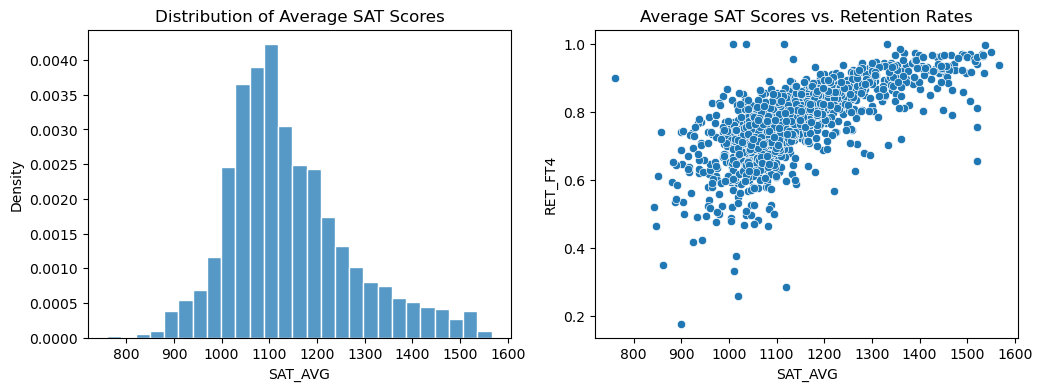

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=FT4_institutions, x='SAT_AVG', edgecolor='white', stat='density', ax=ax1)
ax1.set_title('Distribution of Average SAT Scores')
sns.scatterplot(data=FT4_institutions, x='SAT_AVG', y='RET_FT4', ax=ax2)
ax2.set_title('Average SAT Scores vs. Retention Rates')
plt.savefig('figures/SAT_AVG_VS_RET_FT4.png');

The average SAT score for four year institutions is around 1100. There is a positive relationship between average SAT score and retention rate. In other words, as the average SAT scores increase, the retention rate also increases.

In [5]:
SAT_score_FT4 = filtered_df_two_columns(data, 'SAT_AVG', 'RET_FT4')
SAT_score_FT4.head()

,SAT_AVG,RET_FT4
0,959.0,0.5403
1,1245.0,0.8640
3,1300.0,0.8180
4,938.0,0.6202
5,1262.0,0.8723


In [6]:
pearson_corr_coef(SAT_score_FT4.SAT_AVG, SAT_score_FT4.RET_FT4)

array([[1.20105587e+03, 6.97777529e-01],
       [6.97777529e-01, 8.34092182e-04]])

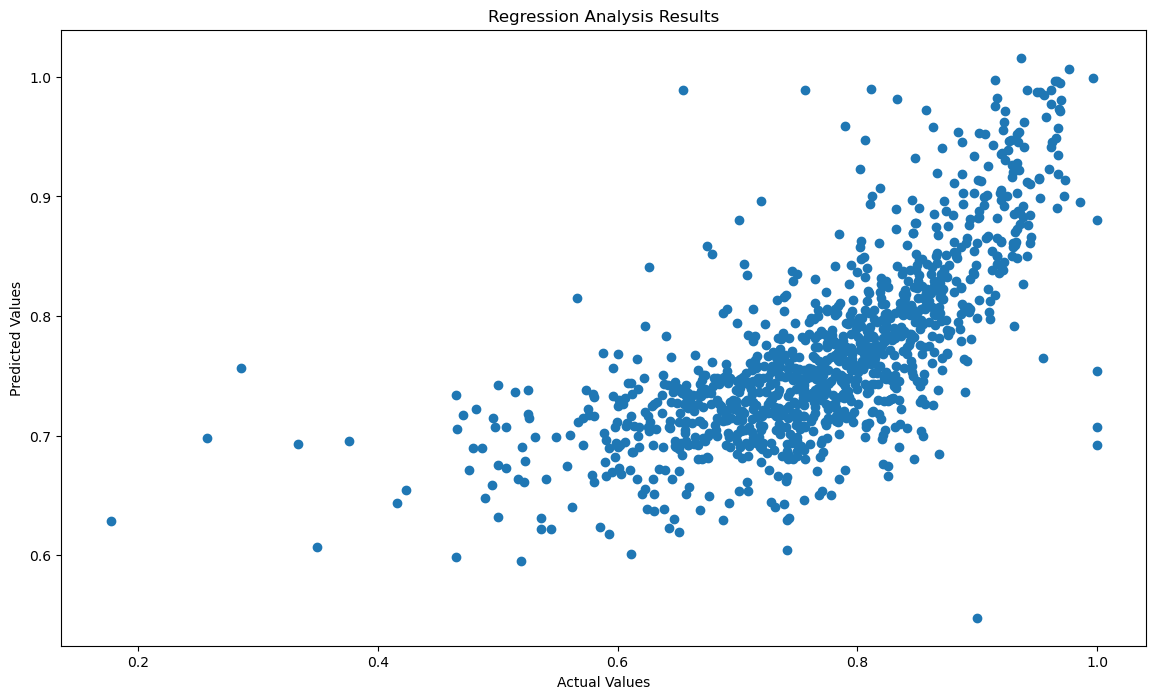

0.4860228610596219

In [7]:
regression_analysis_results(SAT_score_FT4.RET_FT4, prediction_analysis(SAT_score_FT4), 'SATactual_vs_SATpredicted.png')

Based on the R^2 value, a linear model based on SAT average scores explains 0.49 of the variance within retention rates.

In [8]:
calculate_MSE(SAT_score_FT4.RET_FT4, prediction_analysis(SAT_score_FT4))

0.017792116415510515

Thus, due to the low MSE, we believe that average SAT score is a good predictor of four-year retention rates. Based on the regression, higher SAT average score indicates higher retention rates. 

### AVGFACSAL: Average faculty salary

In [9]:
AVGFACSAL_FT4 = filtered_df_two_columns(data, 'AVGFACSAL', 'RET_FT4')
AVGFACSAL_FT4.head()

,AVGFACSAL,RET_FT4
0,7599.0,0.5403
1,11380.0,0.8640
2,4545.0,0.5000
3,9697.0,0.8180
4,7194.0,0.6202


Before using linear models, we visualize the relationship between average faculty salary and student retention and find that it is, in fact, linear.

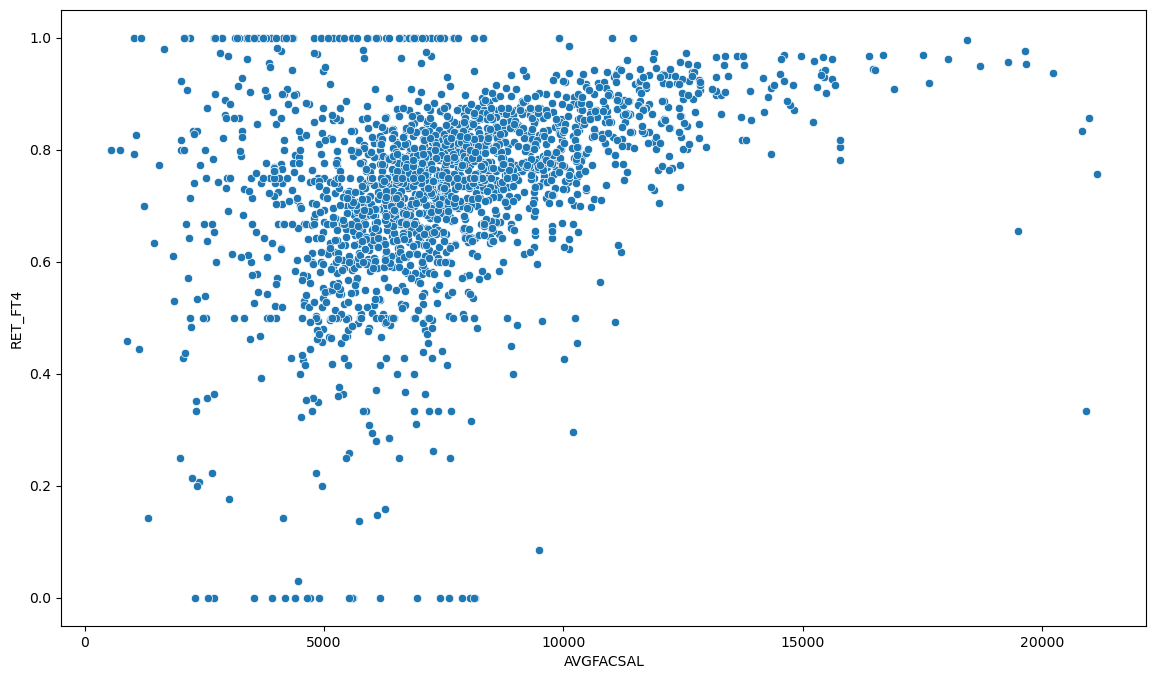

In [10]:
sns.scatterplot(data=AVGFACSAL_FT4, x="AVGFACSAL", y="RET_FT4")
plt.savefig("figures/avgfacsal_retft4_scatter.png")

In [11]:
pearson_corr_coef(AVGFACSAL_FT4.AVGFACSAL, AVGFACSAL_FT4.RET_FT4)

array([[1.66224401e+04, 3.66145436e-01],
       [3.66145436e-01, 6.02185469e-05]])

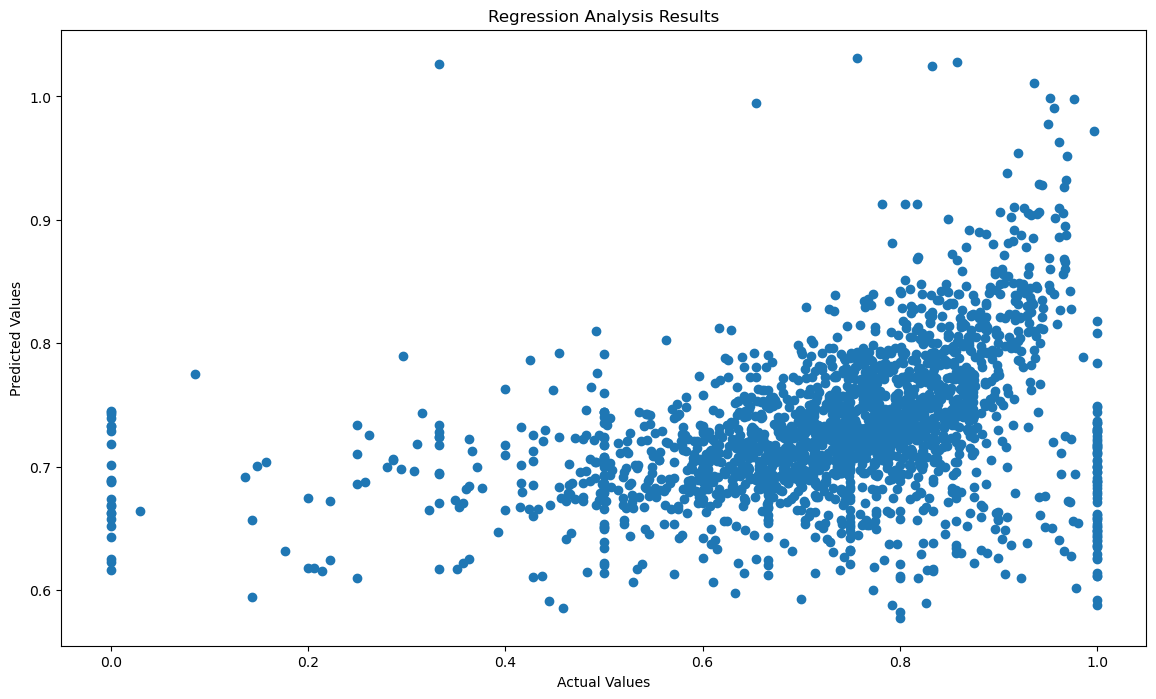

0.1339313356752908

In [12]:
regression_analysis_results(AVGFACSAL_FT4.RET_FT4, prediction_analysis(AVGFACSAL_FT4), 'AVGFACSALactual_vs_AVGFACSALpredicted.png')

Based on the R^2 value, a linear model based on faculty salary explains 0.13 of the variance within retention rates. While it is not the best predictor, there is a general upward trend within the actual vs predicted values, signifying some sort of predicting power.

In [13]:
calculate_MSE(AVGFACSAL_FT4.RET_FT4, prediction_analysis(AVGFACSAL_FT4))

0.03094448077224073

Thus, including the low MSE, we conclude that there is a weak but present relationship between faculty salary and retention at four-year institutions. While faculty salary increases, retention rates increase at the general trend as well.

### PAR_ED_PCT_HS and PAR_ED_PCT_PS: Percent of students whose parents' highest educational level is high school/postsecondary school

As noted in our EDA, these two features have high amounts of null and "PrivacySuppressed" values. We will need to drop these values in order to continue our analysis.

In [14]:
PAR_HS_RET_FT4 = data[["PAR_ED_PCT_HS", "RET_FT4"]].replace("PrivacySuppressed", np.nan).dropna().astype(float)
PAR_PS_RET_FT4 = data[["PAR_ED_PCT_PS", "RET_FT4"]].replace("PrivacySuppressed", np.nan).dropna().astype(float)

Next, we will find the correlation between parent's highschool education and college education respectively with retention at 4 year universities.

In [15]:
no_privacy_suppressed = data[["PAR_ED_PCT_PS", "PAR_ED_PCT_HS", "RET_FT4"]].replace("PrivacySuppressed", np.nan).dropna().astype(float)

corr_HS, p_value_HS = stats.pearsonr(no_privacy_suppressed['PAR_ED_PCT_HS'],  no_privacy_suppressed['RET_FT4'])
corr_PS, p_value_PS = stats.pearsonr(no_privacy_suppressed["PAR_ED_PCT_PS"],  no_privacy_suppressed['RET_FT4'])

print("Correlation of proportion of parents' being highschool educated with retention: " , corr_HS)
print("Correlation of proportion of parents' having some college education with retention: " , corr_PS)

Correlation of proportion of parents' being highschool educated with retention:  -0.5113620230360538
Correlation of proportion of parents' having some college education with retention:  0.47308519546666317


Both also have linear relationships with retention as shown in EDA. Therefore, we can continue with a linear model.

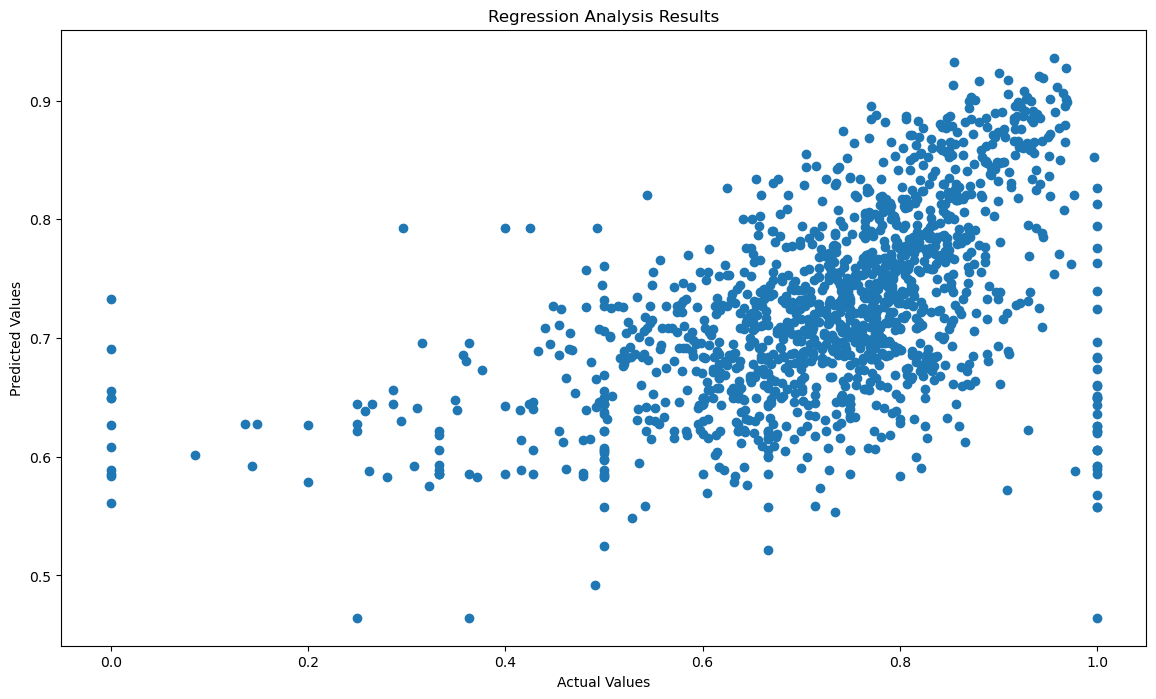

0.2614911186035256

In [16]:
regression_analysis_results(PAR_HS_RET_FT4.RET_FT4, prediction_analysis(PAR_HS_RET_FT4), 'PAR_ED_HSactual_vs_PAR_ED_HSpredicted.png')

Based on the R^2 value, a linear model based on Parent Education (high school) explains 0.26 of the variance within retention rates. While this R^2 value is low, the relationship between actual vs predicted values showcase some sort of predictive power.

In [17]:
calculate_MSE(PAR_HS_RET_FT4.RET_FT4, prediction_analysis(PAR_HS_RET_FT4))

0.03096682761276435

Thus, the low MSE signifies that our predicted retention values based on Parent Education (high school) is not far off from the actual values. This means that there is an increasing linear relationship between the two variables.

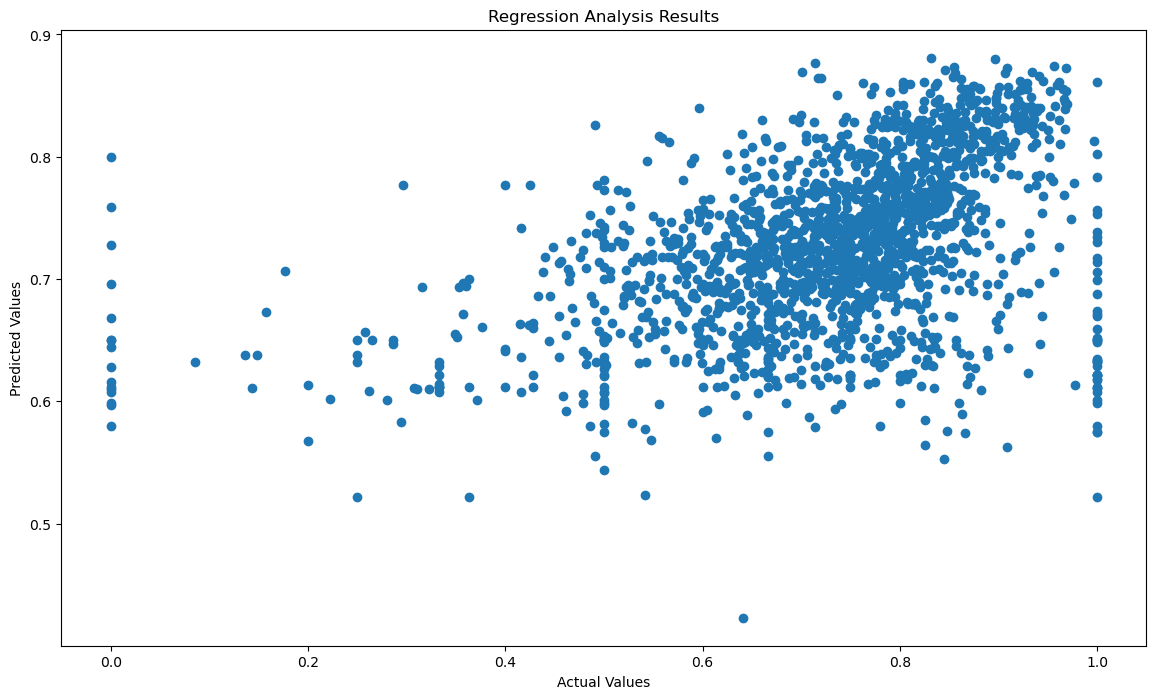

0.19753850951573393

In [18]:
regression_analysis_results(PAR_PS_RET_FT4.RET_FT4, prediction_analysis(PAR_PS_RET_FT4), 'PAR_ED_PSactual_vs_PAR_ED_PSpredicted.png')

Based on the R^2 value, a linear model based on Parent Education (postsecondary school) explains 0.20 of the variance within retention rates. While this R^2 value is lower than Parent Education (high school), the relationship between actual vs. predicted values showcase some sort of predictive power while not as strong.

In [19]:
calculate_MSE(PAR_PS_RET_FT4.RET_FT4, prediction_analysis(PAR_PS_RET_FT4))

0.02902789934662409

However, the MSE of retention rates based on Parent Education (postsecondary school) is actually lower than the MSE of retention rates based on Parent Education (high school). This indicates that our predicted values have less of an error compared to the previous predicted values. **With this in mind, we conclude that both Parent Education variables have some sort of predictive power in retention rates with strengths in different areas.**